In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

### Binomial Distribution

In [2]:
#Flip Ten Coins
dist = stats.binom(n=10, p=0.5)

In [3]:
#Probability of Five Heads
dist.pmf(5)

0.24609375000000025

In [4]:
#Probability Betwen Four and Six Heads
dist.pmf(4) + dist.pmf(5) + dist.pmf(6)

0.6562500000000007

In [5]:
#Probability Betwen Four and Six Heads
dist.cdf(6) - dist.cdf(3)

0.65625

<BarContainer object of 11 artists>

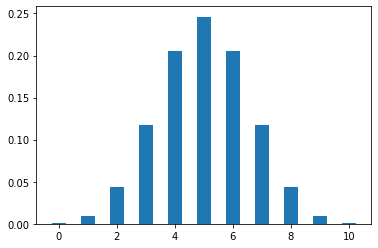

In [6]:
#Get All PMF values
values = np.array([])
pmf_values = np.array([])
for i in range(11):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, dist.pmf(i))
plt.bar(values, height=pmf_values, width=0.5)

In [7]:
#Flip Fifty Coins
dist = stats.binom(n=50, p=0.5)

In [8]:
#Probability Betwen Forty and Sixty Heads
dist.cdf(30) - dist.cdf(19)

0.8810795474405637

<BarContainer object of 51 artists>

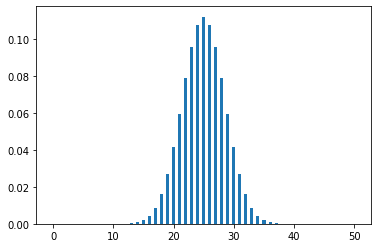

In [9]:
#Get All PMF values
values = np.array([])
pmf_values = np.array([])
for i in range(51):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, dist.pmf(i))
plt.bar(values, height=pmf_values, width=0.5)

### Normal Approximation

In [10]:
#Probability of getting less than 23 heads - Binomial Distribution
dist = stats.binom(n=50, p=0.5)
dist.cdf(23)

0.3359055168826827

In [11]:
dist.mean()

25.0

In [12]:
dist.std()

3.5355339059327378

In [13]:
#Probability of getting more than 23 heads
1 - dist.cdf(23)

0.6640944831173172

In [14]:
#Probability of getting less than 23 heads - Normal Approximation
dist = stats.norm(25, 3.5355339059327378)
dist.cdf(23.5)

0.3356866202704363

In [15]:
#Probability of gtting more than 23 heads - Normal Approximation
1 - dist.cdf(23.5)

0.6643133797295637

### Central Limit Theorem - Cold Calling Customers Example

For our cold-calling example in class, we can create a bernoulli distribution with a probability of 0.2. We can then simulate 30 trials of it 10,000 times.

In [16]:
np.random.seed(42)
dist = stats.bernoulli(p=0.2)
successes = np.array([])
for i in range(10000):
    successes = np.append(successes, dist.rvs(30).sum())

Note that running this will return the number of successfully converted customers for each run of our 10,000 simulations.

In [17]:
successes

array([4., 8., 6., ..., 6., 5., 6.])

In [18]:
len(successes)

10000

If we want to look at the success *rate*, we can divide this value by 30.

In [19]:
success_rate = successes / 30
success_rate

array([0.13333333, 0.26666667, 0.2       , ..., 0.2       , 0.16666667,
       0.2       ])

(array([1.020e+02, 3.780e+02, 7.620e+02, 1.273e+03, 1.745e+03, 1.786e+03,
        1.578e+03, 1.083e+03, 6.570e+02, 3.680e+02, 1.610e+02, 6.900e+01,
        2.900e+01, 6.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
         7.4375,  8.5   ,  9.5625, 10.625 , 11.6875, 12.75  , 13.8125,
        14.875 , 15.9375, 17.    ]),
 <a list of 16 Patch objects>)

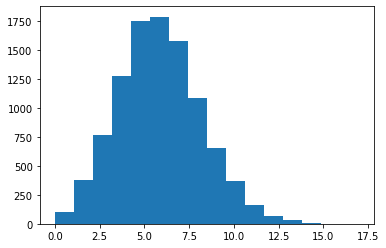

In [20]:
#Plot the Distribution of Successes
plt.hist(successes, bins=16)

(array([1.020e+02, 3.780e+02, 7.620e+02, 1.273e+03, 1.745e+03, 1.786e+03,
        1.578e+03, 1.083e+03, 6.570e+02, 3.680e+02, 1.610e+02, 6.900e+01,
        2.900e+01, 6.000e+00, 2.000e+00, 1.000e+00]),
 array([0.        , 0.03541667, 0.07083333, 0.10625   , 0.14166667,
        0.17708333, 0.2125    , 0.24791667, 0.28333333, 0.31875   ,
        0.35416667, 0.38958333, 0.425     , 0.46041667, 0.49583333,
        0.53125   , 0.56666667]),
 <a list of 16 Patch objects>)

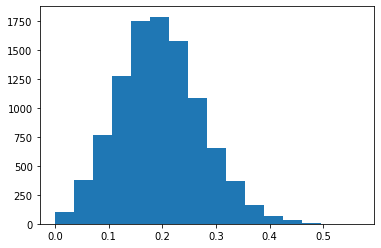

In [21]:
#Plot the Distribution of Success Rate
plt.hist(success_rate, bins=16)

Note the mean and standard deviation of the underlying Bernoulli distribution.

In [22]:
dist.mean()

0.2

In [23]:
dist.std()

0.4

Now let's see the mean and standard deviation of our simulated results.

In [24]:
np.mean(success_rate)

0.20024333333333333

In [25]:
np.std(success_rate)

0.0736013791386487

Note that the standard deviation of the underlying distribution divided by the square root of the sample size (here 30) is very close to the standard deviation of our simulated results!

In [26]:
dist.std() / np.sqrt(30)

0.07302967433402215

### Central Limit Theorem - Bank Spend Example

First we'll set up the underlying normal distribution with a mean of 50 and standard deviation of 15.

In [27]:
dist = stats.norm(loc=50, scale=15)

In [28]:
dist.mean()

50.0

In [29]:
dist.std()

15.0

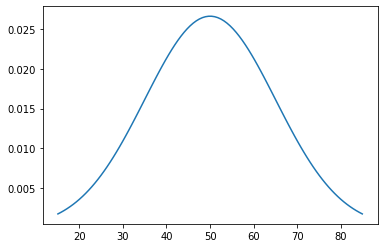

In [30]:
df = pd.DataFrame()
df['value'] = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
df['PDF'] = dist.pdf(df['value'])
df['CDF'] = dist.cdf(df['value'])
plt.plot(df['value'], df['PDF'])

Now we can take 10,000 simulations of 100 customers and get the **mean value** of each simulation.

In [31]:
dist.rvs(100)

array([48.76047209, 33.07151084, 44.79241356, 60.49639364, 42.62792006,
       49.08053565, 24.90025551, 65.65338744, 61.71405219, 77.66423818,
       63.57329892, 61.12356641, 50.66949727, 25.76595298, 20.6759277 ,
       76.93071797, 58.28691474, 47.868437  , 29.30286879, 59.38021242,
       63.16493445, 64.49816608, 63.21492755, 67.94643515, 46.49582019,
       41.53380436, 54.48849065, 38.76283162, 54.08412834, 27.50677899,
       48.81853469, 61.7040822 , 70.4491041 , 53.98030602, 57.9968567 ,
       50.97213301, 62.88633195, 49.46455294, 60.28188564, 35.37862158,
       34.59963112, 53.61908106, 56.93373522, 37.89604188, 54.65557322,
       37.15195089, 44.95784714, 60.31680055, 53.52537829, 26.3300048 ,
       68.61848164, 45.34448622, 24.90279563, 57.16354914, 54.68911142,
       36.57858331, 48.71211667, 70.19391855, 58.76832267, 77.20147836,
       56.30465312, 53.27394005, 71.20817312, 38.59658769, 47.69712488,
       61.58316107, 52.07018576, 64.6556148 , 51.07793057, 62.48

In [32]:
np.random.seed(42)
dist = stats.norm(loc=50, scale=15)
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(dist.rvs(100)))

The Seaborn KDEPlot function can set up a density graph for an array of numbers.

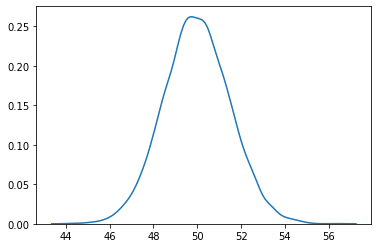

In [33]:
sns.kdeplot(simulation)

Again, note that the simulation has a mean very close to the mean of the underlying normal distribution and a standard deviation equal to the standard deviation of the underlying distribution divided by the square root of the sample size!

In [34]:
np.mean(simulation)

49.976003653186154

In [35]:
np.std(simulation)

1.5122034988236783

In [36]:
dist.std() / np.sqrt(100)

1.5

Say we want to find the probability that the mean from 100 randomly sampled customers will be greater than 54. We can set up a nomal function like we did earlier. The mean will be the same as the mean of the underlying distribution, and the standard deviation will be equal to the standard deviation of the original distribution divided by the square root of the sample size.

In [37]:
#Probability that a randomly sampled customer will be greater than 54
1 - stats.norm(loc=50, scale=15).cdf(54)

0.3948629104640251

In [38]:
#Probability that the mean of 100 randomly sampled customers will be greater than 54
1 - stats.norm(loc=50, scale=15 / np.sqrt(100)).cdf(54)

0.003830380567589775

### Central Limit Theorem - Further Proof

### Exponential Distribution

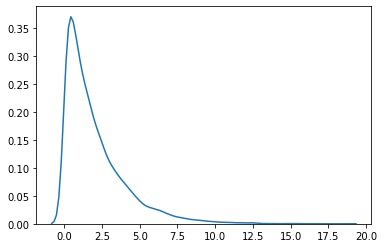

In [39]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(1)))
sns.kdeplot(simulation)

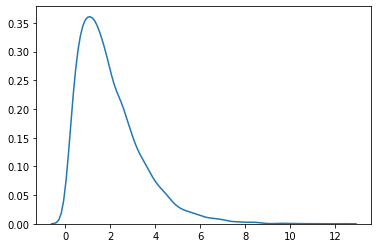

In [40]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(2)))
sns.kdeplot(simulation)

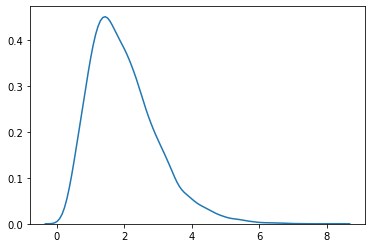

In [41]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(4)))
sns.kdeplot(simulation)

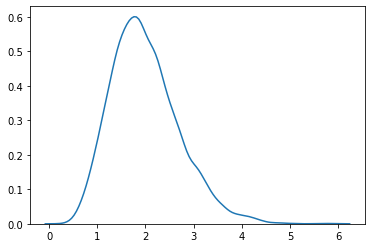

In [42]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(8)))
sns.kdeplot(simulation)

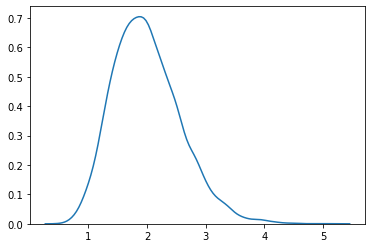

In [43]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(12)))
sns.kdeplot(simulation)

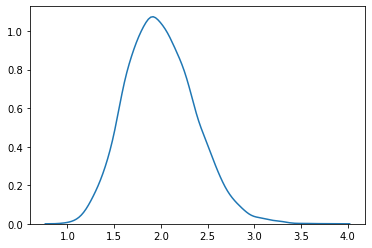

In [44]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(30)))
sns.kdeplot(simulation)

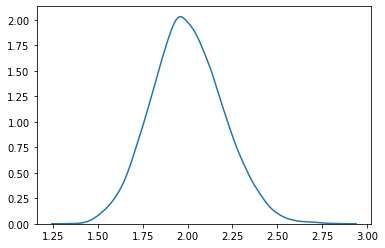

In [45]:
simulation = np.array([])
for i in range(10000):
    simulation = np.append(simulation, np.mean(stats.expon(scale=2).rvs(100)))
sns.kdeplot(simulation)

In [46]:
#Mean of the Underlying Distribution
stats.expon(scale=2).mean()

2.0

In [47]:
#Standard Deviation of the Underlying Distribution
stats.expon(scale=2).std()

2.0

In [48]:
#Standard Deviation of the Underlying Distribution divided by the Square Root of the Sample Size
stats.expon(scale=2).std() / np.sqrt(100)

0.2

In [49]:
#Mean of Our Simulation
np.mean(simulation)

1.9992603520604717

In [50]:
#Standard Deviation of Our Simulation
np.std(simulation)

0.19964284735736554